# RY - Spectra Average

## Load Libraries

In [10]:
from andbro__querrySeismoData import __querrySeismoData
from andbro__savefig import __savefig

from obspy import UTCDateTime
from scipy.signal import welch
from numpy import log10, zeros, pi, append, linspace, mean, median, array, where, transpose, shape, histogram, arange
from numpy import logspace, linspace, log, log10, isinf, ones, nan, count_nonzero, sqrt, isnan
from pandas import DataFrame, concat, Series, date_range, read_csv, read_pickle
from tqdm import tqdm_notebook
from pathlib import Path

import os
import pickle
import matplotlib.pyplot as plt

In [11]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
    bay_path = '/home/andbro/bay200/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'
elif os.uname().nodename == 'lin-ffb-01':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'

## Configurations

In [13]:
path_to_data = data_path+"LNM2/data/"

stas = ["RY01", "RY02", "RY05", "RY06", "RY07", "RY08", "RY09"]

path_to_figs = archive_path+f"ModalAnalysis/figures/"


In [14]:
psds = {}

for sta in stas:
    for cha in ["Z", "N", "E"]:
        _psd = read_pickle(path_to_data+f"2023_{sta}_HH{cha}_psd_median.pkl")
        psds['ff'] = _psd.frequencies
        if cha == "Z":
            psds[sta] = {}
        psds[sta][cha] = _psd.psds_median


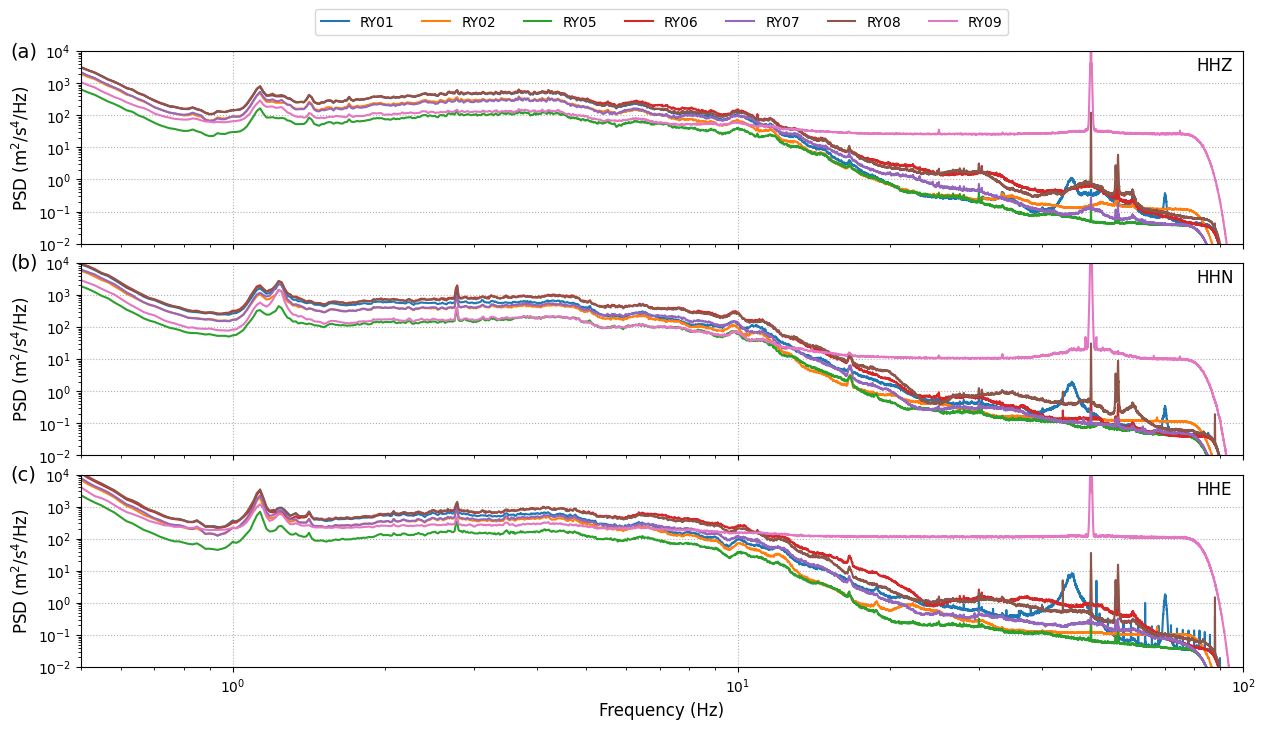

In [15]:
def __makeplot():

    Nrow, Ncol = 3, 1

    font = 12

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(15, 8), sharex=True)

    plt.subplots_adjust(hspace=0.1)

    for sta in stas:
        ax[0].loglog(psds["ff"], psds[sta]["Z"], label=f"{sta}")

    for sta in stas:
        ax[1].loglog(psds["ff"], psds[sta]["N"], label=f"{sta}")

    for sta in stas:
        ax[2].loglog(psds["ff"], psds[sta]["E"], label=f"{sta}")

    for _n in range(Nrow):
        ax[_n].grid(ls=":", zorder=0)
        # ax[_n].legend(loc=1, ncol=3)
        ax[_n].set_xlim(5e-1, 1e2)
        ax[_n].set_ylim(1e-2, 1e4)
        ax[_n].set_ylabel(r"PSD (m$^2$/s$^4$/Hz)", fontsize=font)

    ax[2].set_xlabel("Frequency (Hz)", fontsize=font)

    ax[0].legend(bbox_to_anchor=(0.5, 1.05), ncol=len(stas))

    ## panel labels
    ax[0].text(-.06, 1.05, '(a)', ha='left', va='top', transform=ax[0].transAxes, fontsize=font+2)
    ax[1].text(-.06, 1.05, '(b)', ha='left', va='top', transform=ax[1].transAxes, fontsize=font+2)
    ax[2].text(-.06, 1.05, '(c)', ha='left', va='top', transform=ax[2].transAxes, fontsize=font+2)


    ax[0].text(.96, .97, 'HHZ', ha='left', va='top', transform=ax[0].transAxes, fontsize=font)
    ax[1].text(.96, .97, 'HHN', ha='left', va='top', transform=ax[1].transAxes, fontsize=font)
    ax[2].text(.96, .97, 'HHE', ha='left', va='top', transform=ax[2].transAxes, fontsize=font)

    plt.show();
    return fig


fig = __makeplot();

fig.savefig(path_to_figs+f"RY_Spectra_Averages.png", format="png", dpi=150, bbox_inches='tight')
